In [50]:
import sympy as sp

# Définition des symboles
x, y = sp.symbols('x y', real=True)


In [51]:
# La fonction
f = lambda x,y : 2*x-y**3+x**2*y
f(x,y)

x**2*y + 2*x - y**3

In [52]:
# Le gradient
df_dx = sp.diff(f(x,y),x)
df_dy = sp.diff(f(x,y),y)
display(df_dx)
display(df_dy)

2*x*y + 2

x**2 - 3*y**2

In [53]:
# Le gradient --- Affichage amélioré
df_dx = sp.diff(f(x, y), x)
df_dy = sp.diff(f(x,y), y)
gradient = sp.Matrix([df_dx, df_dy])
gradient


Matrix([
[    2*x*y + 2],
[x**2 - 3*y**2]])

In [54]:
# Equation du plan tangent en (x_0, y_0)
x0, y0 = sp.symbols('x_0 y_0', real=True)
#x0, y0 = 1, 1
plan_tangent = f(x0, y0) + (x-x0)*df_dx.subs({x:x0,y:y0}) + (y-y0)*df_dy.subs({x:x0,y:y0})
plan_tangent

x_0**2*y_0 + 2*x_0 - y_0**3 + (x - x_0)*(2*x_0*y_0 + 2) + (x_0**2 - 3*y_0**2)*(y - y_0)

In [55]:
# Points critiques
critical_points = sp.solve([df_dx, df_dy], (x,y))
critical_points

[(-3**(1/4), 3**(3/4)/3), (3**(1/4), -3**(3/4)/3)]

In [56]:
# Points critiques --- Affichage amélioré
for i in range(len(critical_points)):
    # display(Math(f'P_{i} = {sp.latex(critical_points[i])}'))
    display(Markdown(r""))

NameError: name 'Markdown' is not defined

In [12]:
# La matrice Hessienne
d2f_dxx = sp.diff(df_dx, x)
d2f_dxy = sp.diff(df_dx, y)
d2f_dyx = sp.diff(df_dy, x)
d2f_dyy = sp.diff(df_dy, y)
hessian = sp.Matrix([[d2f_dxx, d2f_dxy], [d2f_dyx, d2f_dyy]])
hessian

Matrix([
[2*y,  2*x],
[2*x, -6*y]])

In [13]:
det_hessian = d2f_dxx*d2f_dyy - d2f_dxy*d2f_dyx
det_hessian

-4*x**2 - 12*y**2

In [ ]:
# Analyse de la nature des point critiques

for x_c, y_c in critical_points:
    hessian_at_critical = hessian.subs({x:x_c, y:y_c})
    det_hessian_at_critical = det_hessian.subs({x:x_c, y:y_c})
    print(f"(x_c,y_cb)")

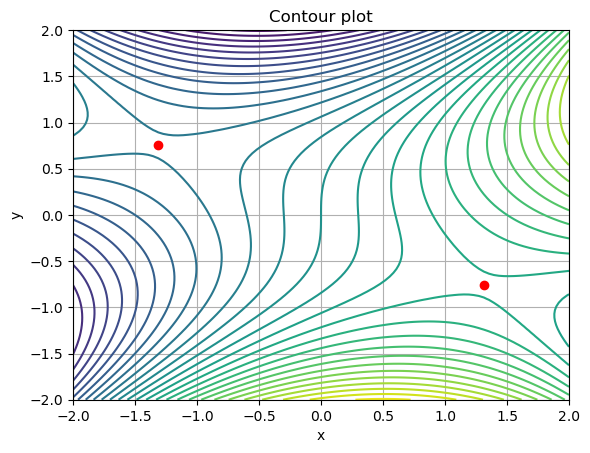

In [49]:
import numpy as np
import matplotlib.pyplot as plt

g = sp.lambdify((x,y), f(x,y), 'numpy')

x = np.linspace(-2,2,100)
y = np.linspace(-2,2,100)
X,Y = np.meshgrid(x,y)
Z = g(X,Y)

plt.contour(X,Y, Z, levels=30)

xx_c = [float(P[0]) for P in critical_points]
yy_c = [float(P[1]) for P in critical_points]
plt.scatter( xx_c, yy_c, color='red')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Contour plot')
plt.grid(True)
# plt.savefig('contour_plot.png')
# plt.show()